In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [852]:
arr=pd.read_csv('../music/experiment/ArraytrackResults.txt', delimiter='\t')
arr['perSpec'] = 1
arr['smoothing'] = arr['subArrNum'] > 1
arr['backw'] = arr['backwSmth'] == 1
arr['bandwidth'] = 20
arr['decimation'] = False

cols = arr.columns.tolist()
cols = [cols[2]] + cols[3:6] + [cols[0]] + cols[-6:-3] + [cols[-3]] + cols[-2:] + cols[6:11]
arr = arr[cols]
arr['errorNextAngle'] = abs(arr.nextAngle - arr.realAngle)

In [853]:
ori=pd.read_csv('../music/experiment/OrionResults.txt', delimiter='\t')
ori['errorNextAngle'] = abs(ori.nextAngle - ori.realAngle)
ori['smoothing'] = False
ori['backw'] = False
ori['decimation'] = ori['decimation'] == 1
ori = ori.rename(columns={'packetPerSpec':'perSpec'})

cols = ori.columns.tolist()
cols = cols[1:5] + [cols[0]] + cols[-7:-5] + cols[-2:] + cols[-5:-3] + cols[5:10] + [cols[-3]]
ori = ori[cols]

In [854]:
spotfi=pd.read_csv('SpotfiClusters/SpotfiResults.txt', delimiter='\t')
spotfi=spotfi.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi['errorAngle'] = abs(spotfi.meanA1 - spotfi.realAngle)
spotfi['errorNextAngle'] = abs(spotfi.realAngle - spotfi.meanA2)
spotfi['errorNextNextAngle'] = abs(spotfi.realAngle - spotfi.meanA3)
spotfi = spotfi.rename(columns={'packetPerSpec':'perSpec'})
spotfi.smoothing = spotfi.smoothing == 1
spotfi.backw = spotfi.backw == 1
spotfi.decimation = spotfi.decimation == 1
spotfi['estAngle'] = spotfi.meanA1
spotfi['nextAngle'] = spotfi.meanA2
spotfi['nextNextAngle'] = spotfi.meanA3

cols = spotfi.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi = spotfi[cols]

spotfi['spectrumsNum'] = (spotfi.packetNum / spotfi.perSpec)

In [855]:
spotfi_fixed=pd.read_csv('SpotfiClusters/SpotfiResults_fixed_eigen.txt', delimiter='\t')
spotfi_fixed=spotfi_fixed.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi_fixed['errorAngle'] = abs(spotfi_fixed.meanA1 - spotfi_fixed.realAngle)
spotfi_fixed['errorNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA2)
spotfi_fixed['errorNextNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA3)
spotfi_fixed = spotfi_fixed.rename(columns={'packetPerSpec':'perSpec'})
spotfi_fixed.smoothing = spotfi_fixed.smoothing == 1
spotfi_fixed.backw = spotfi_fixed.backw == 1
spotfi_fixed.decimation = spotfi_fixed.decimation == 1
spotfi_fixed['estAngle'] = spotfi_fixed.meanA1
spotfi_fixed['nextAngle'] = spotfi_fixed.meanA2
spotfi_fixed['nextNextAngle'] = spotfi_fixed.meanA3

cols = spotfi_fixed.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi_fixed = spotfi_fixed[cols]

spotfi_fixed['spectrumsNum'] = (spotfi_fixed.packetNum / spotfi_fixed.perSpec)

# Look at data

In [856]:
arr.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,30,1,True,True,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
1,1,8.3404,16.5439,39.6584,8,10,1,True,True,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
2,1,8.3404,16.5439,39.6584,8,30,1,True,False,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
3,1,8.3404,16.5439,39.6584,8,10,1,True,False,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
4,1,8.3404,16.5439,39.6584,8,30,1,False,True,20,False,39.7367,0.049013,0.078258,999.0,999.0,959.3416


In [851]:
ori.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.6733,0.070373,0.014925,-54.1333,2.8215,93.7917
1,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.7200,0.044721,0.061591,-55.6200,1.8116,95.2784
2,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8167,0.101990,0.158260,-15.1333,3.6398,54.7917
3,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8100,0.128670,0.151590,-0.9100,3.3044,40.5684
4,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,True,39.8733,0.070373,0.214920,-51.6000,2.9367,91.2584


In [614]:
spotfi.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,nextAngle,nextNextAngle,errorAngle,errorNextAngle,errorNextNextAngle,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,30,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,True,40.0,NaN,NaN,0.3416,NaN,NaN,30,0.0,0.254,40.0,43.933,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,15,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,True,40.0,NaN,NaN,0.3416,NaN,NaN,15,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,10,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0


In [857]:
spotfi_fixed.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,nextAngle,nextNextAngle,errorAngle,errorNextAngle,errorNextNextAngle,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,30,0.0,0.305,40.0,43.900,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,True,40.0,NaN,NaN,0.3416,NaN,NaN,30,0.0,0.254,40.0,43.933,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,15,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,True,40.0,NaN,NaN,0.3416,NaN,NaN,15,0.0,0.000,40.0,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,False,40.0,NaN,NaN,0.3416,NaN,NaN,10,0.0,0.422,40.0,43.800,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0


# Let's look at CDF of data

In [974]:
class param:
    def __init__(self, alg, ant, backw, packNum, sm=0, perSpec=1, band=20, dec=0, seed_lim=10000):
        self.alg = alg
        self.ant = ant
        self.sm = sm
        self.backw = backw
        self.packNum = packNum
        self.perSpec = perSpec
        self.band = band
        self.dec = dec
        self.seed_lim = seed_lim

In [1065]:
def bool2str(x):
    if x:
        return str(1)
    else:
        return str(0)

def plotResults(paramList, angleLimits, title, xlim):
    fig, axes = plt.subplots(figsize=(14,8))

    for param in paramList:
        if param.alg == "arraytrack":
            df = arr
            label = "Arraytrack"
            label += " (ant: " + str(param.ant) + \
            "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + ")"
            param.sm = 1; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "music":
            df = arr
            label = "Classical music"
            label += " (ant: " + str(param.ant) + \
            "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + ")"
            param.sm = 0; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "orion":
            df = ori
            label = "Orion"
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; perSpec: " + str(param.perSpec) + "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi":
            df = spotfi
            label = "Spotfi"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi_fixed":
            df = spotfi_fixed
            label = "Spotfi (fixed eigen)"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "oparray":
            df = spotfi
            label = "OpArray"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")" 
        elif param.alg == "oparray_fixed":
            df = spotfi_fixed
            label = "OpArray (fixed eigen)"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
            
        df = df[(abs(df.realAngle) < angleLimits[1]) & (abs(df.realAngle) > angleLimits[0]) \
                & (df.ant == param.ant) & (df.smoothing == param.sm) \
                & (df.backw == param.backw) & (df.packetNum == param.packNum) \
                & (df.perSpec == param.perSpec) & (df.bandwidth == param.band) \
                & (df.decimation == param.dec) & (df.seed < param.seed_lim)]

        sorted_df = np.sort(df.errorAngle)
        p = 1. * np.arange(len(sorted_df)) / (len(sorted_df) - 1)

        plt.plot(sorted_df, p, label=label)

    plt.legend(loc='best', fontsize=14)
    axes.set_title(title, fontdict={'fontsize':30})
    axes.set_xlabel('Angle error', size=25)
    axes.set_ylabel('p', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_xlim([0, xlim])

# Arraytrack or Music?

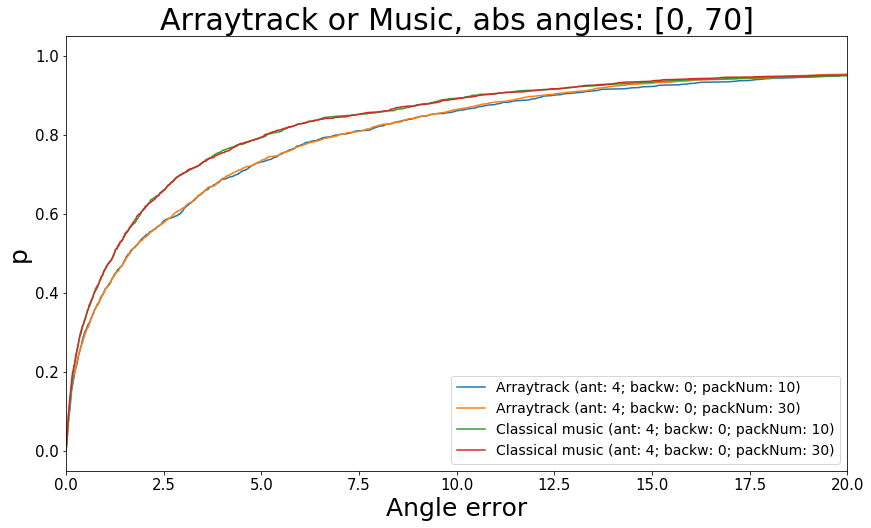

In [1172]:
p1 = param(alg="arraytrack", ant=4, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=4, backw=0, packNum=30, seed_lim=2000)
p3 = param(alg="music", ant=4, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=0, packNum=30, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Arraytrack or Music, abs angles: [0, 70]", 20)

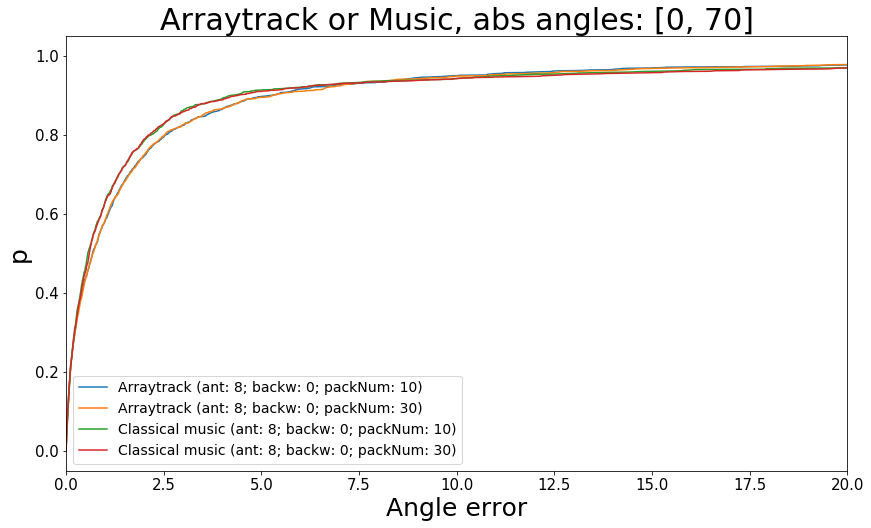

In [1173]:
p1 = param(alg="arraytrack", ant=8, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=2000)
p3 = param(alg="music", ant=8, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Arraytrack or Music, abs angles: [0, 70]", 20)

1) Classical music is better than Arraytrack. It is more noticeable in the case of 4 antennas.

2) Number of packets doesn't affect estimation accuracy in case of Arraytrack and Music.

# What about backward smoothing for Arraytrack and Music?

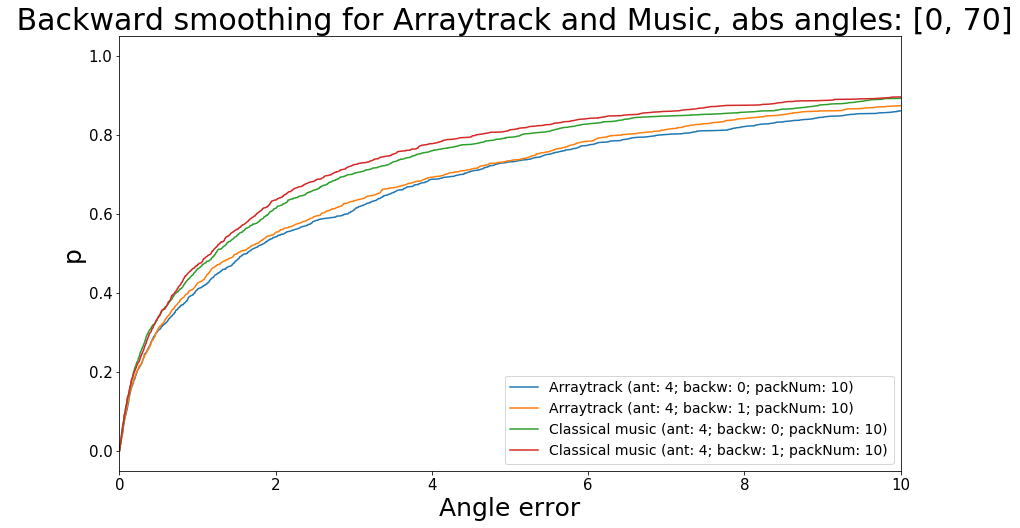

In [1176]:
p1 = param(alg="arraytrack", ant=4, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=4, backw=1, packNum=10, seed_lim=2000)
p3 = param(alg="music", ant=4, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=1, packNum=10, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music, abs angles: [0, 70]", 10)

1) Backward smoothing increases accuracy in case of 4 antennas.

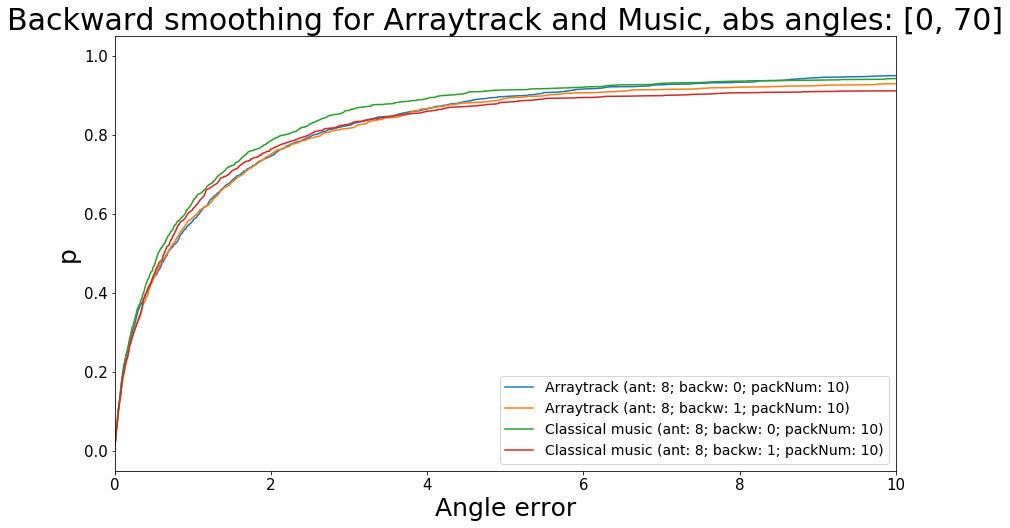

In [1177]:
p1 = param(alg="arraytrack", ant=8, backw=0, packNum=10, seed_lim=2000)
p2 = param(alg="arraytrack", ant=8, backw=1, packNum=10, seed_lim=2000)
p3 = param(alg="music", ant=8, backw=0, packNum=10, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=1, packNum=10, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music, abs angles: [0, 70]", 10)

1) However backward smoothing decreases accuracy in case of 8 antennas.

# Which configuration of Orion is the best?

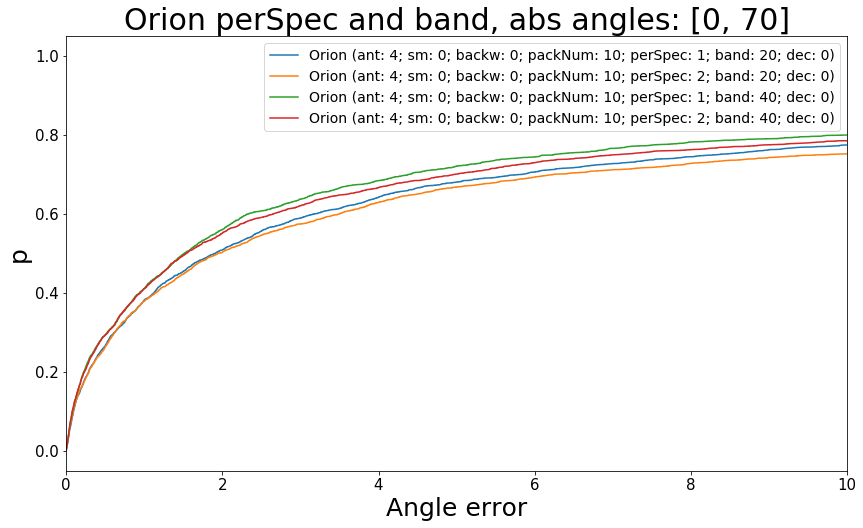

In [1178]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

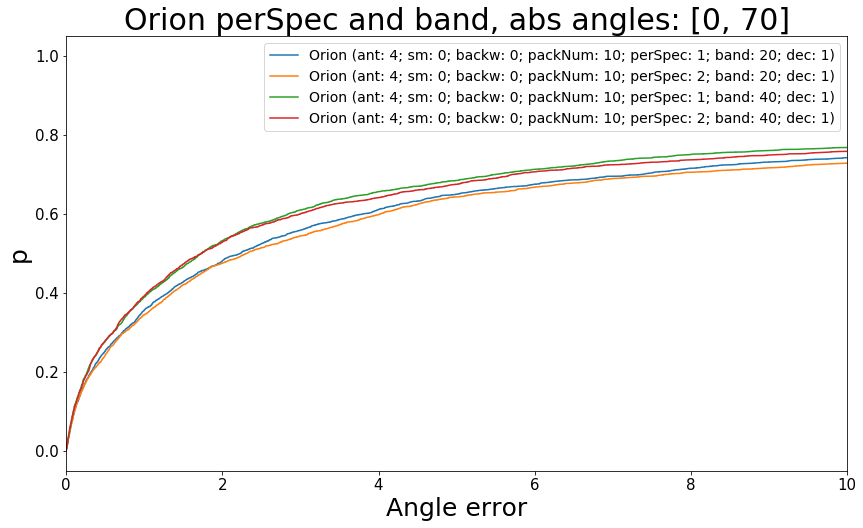

In [1179]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

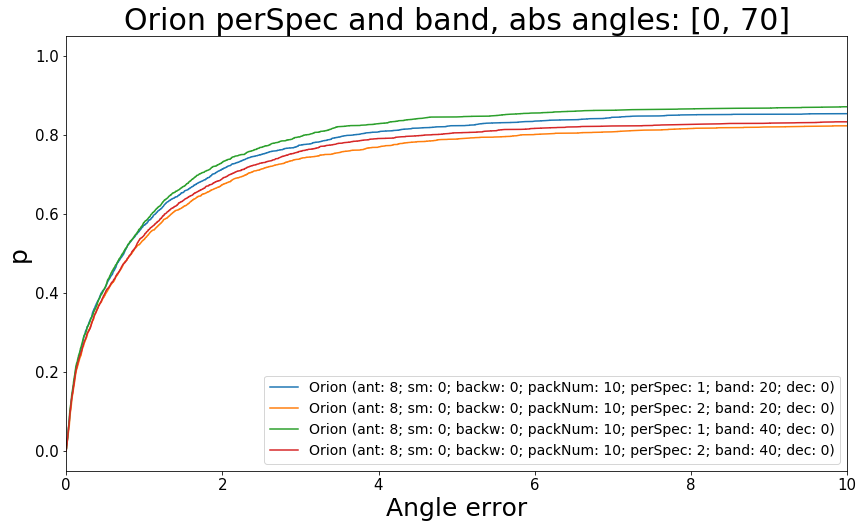

In [1227]:
p1 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=2000)
p3 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

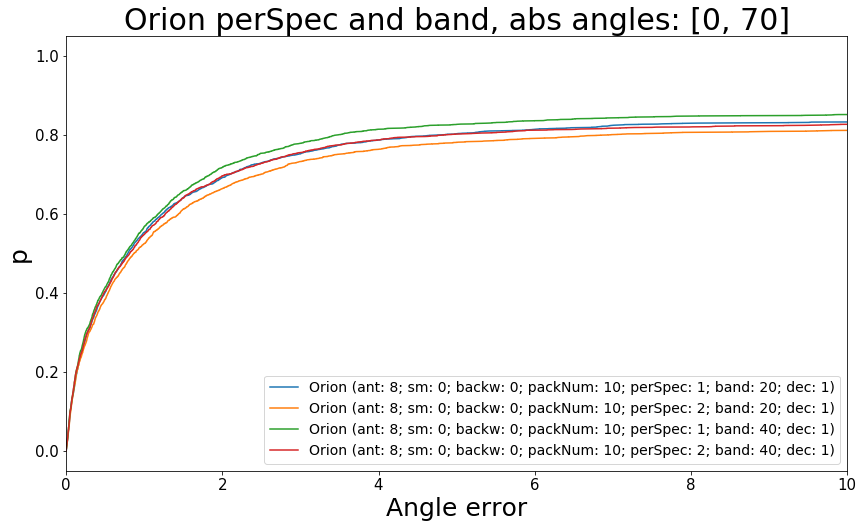

In [1181]:
p1 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p2 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)
p4 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion perSpec and band, abs angles: [0, 70]", 10)

1) Multiple packets per spectrum decrease accuracy

2) Wider bandwidth increases accuracy

# What about subcarrier decimation in case of Orion?

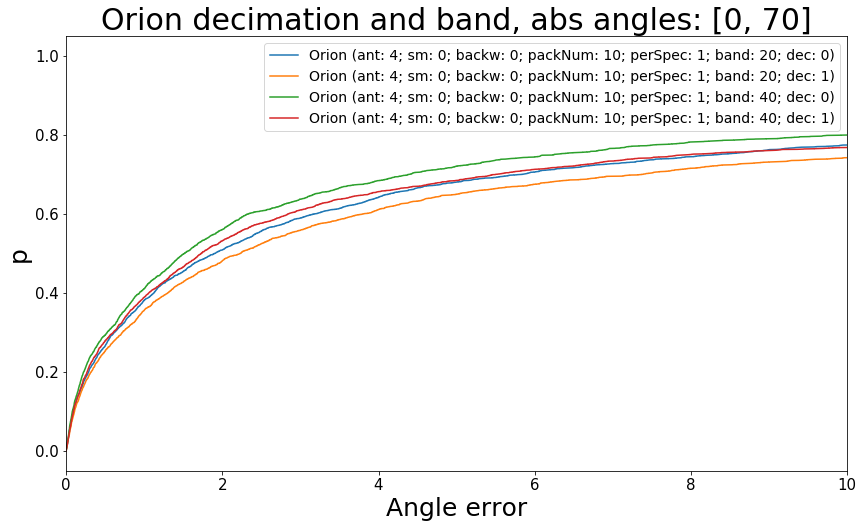

In [1182]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion decimation and band, abs angles: [0, 70]", 10)

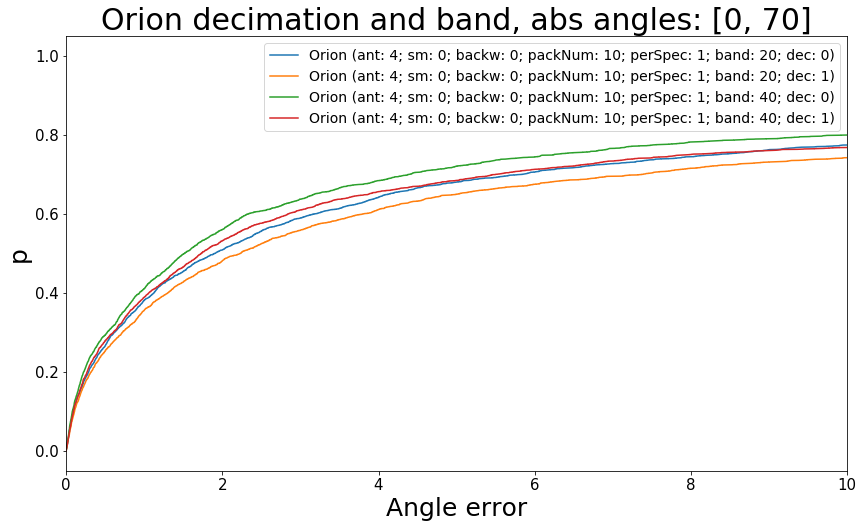

In [1183]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Orion decimation and band, abs angles: [0, 70]", 10)

1) More subcarriers - better accuracy.

# Which way of choosing eigen values in Spotfi is better?

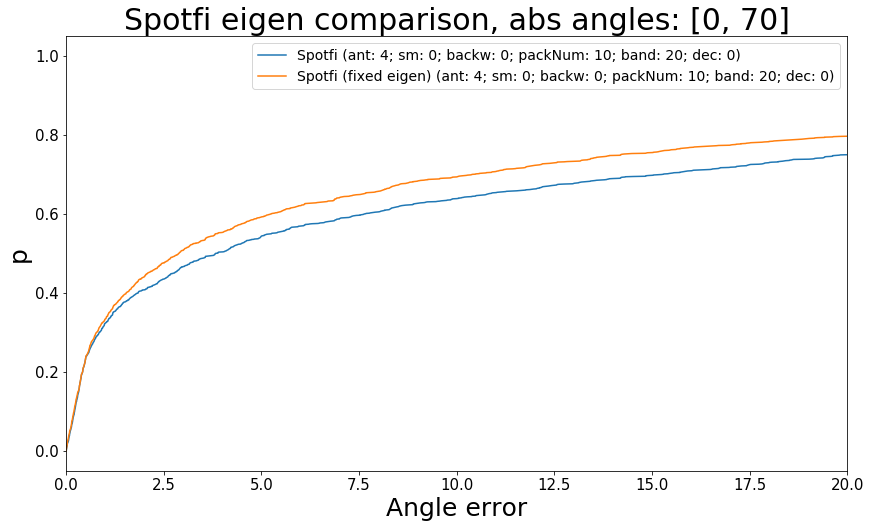

In [1184]:
p1 = param(alg="spotfi", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

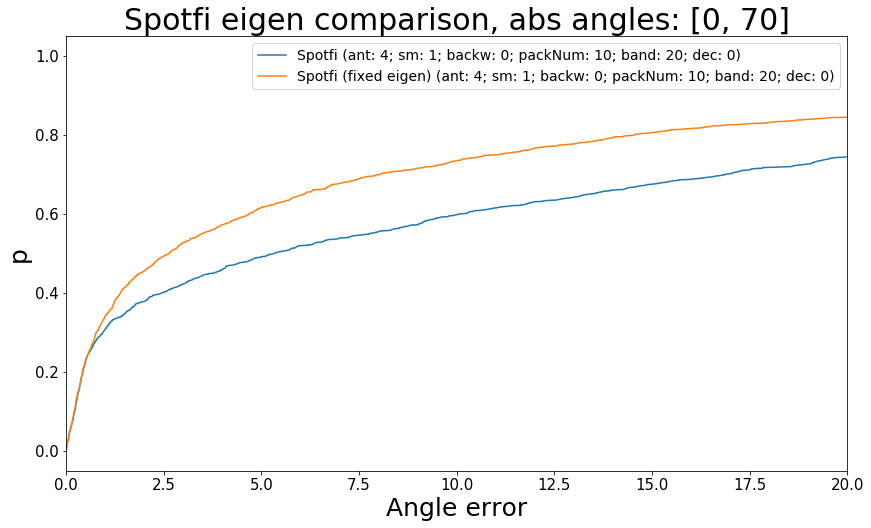

In [1185]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

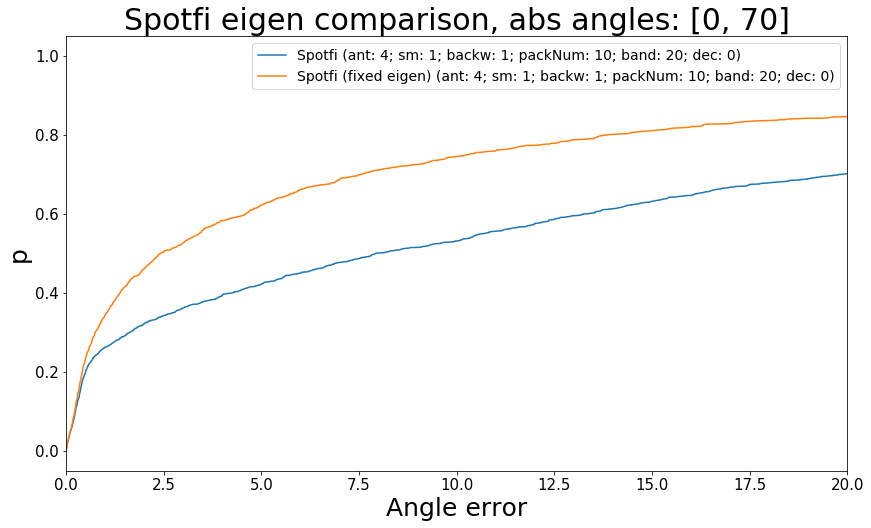

In [1186]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

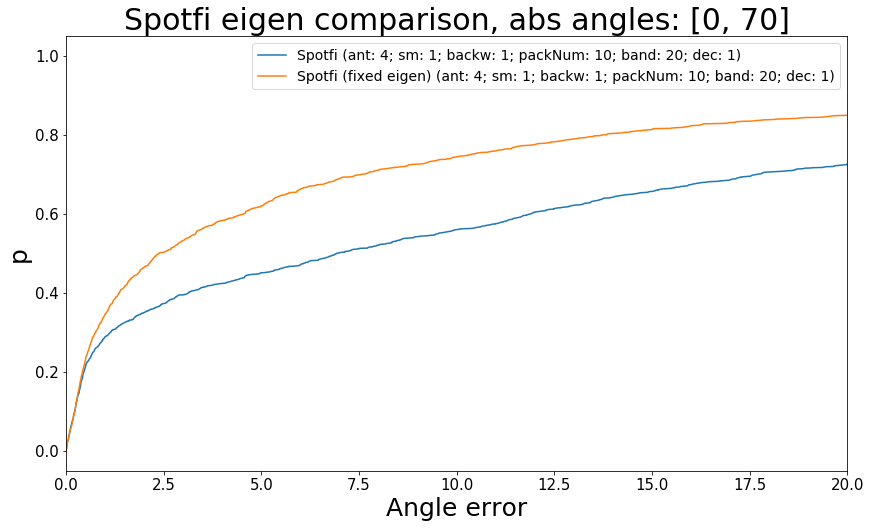

In [1187]:
p1 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

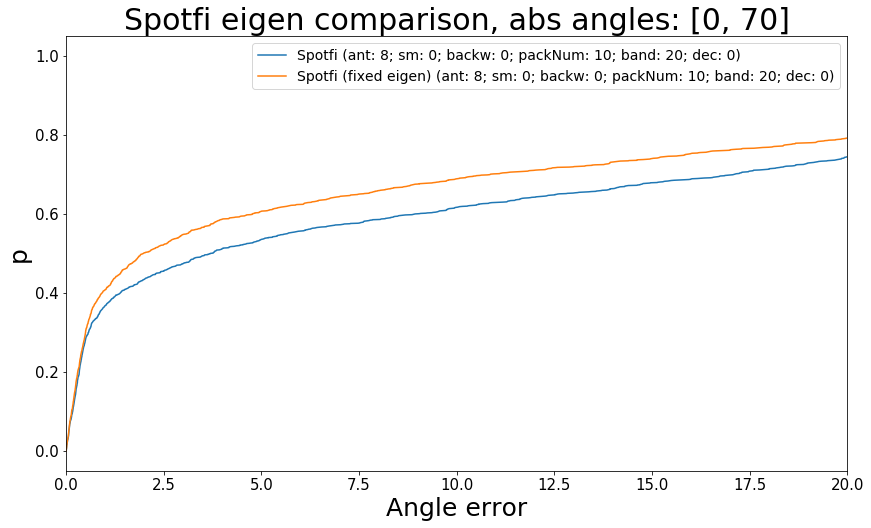

In [1188]:
p1 = param(alg="spotfi", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

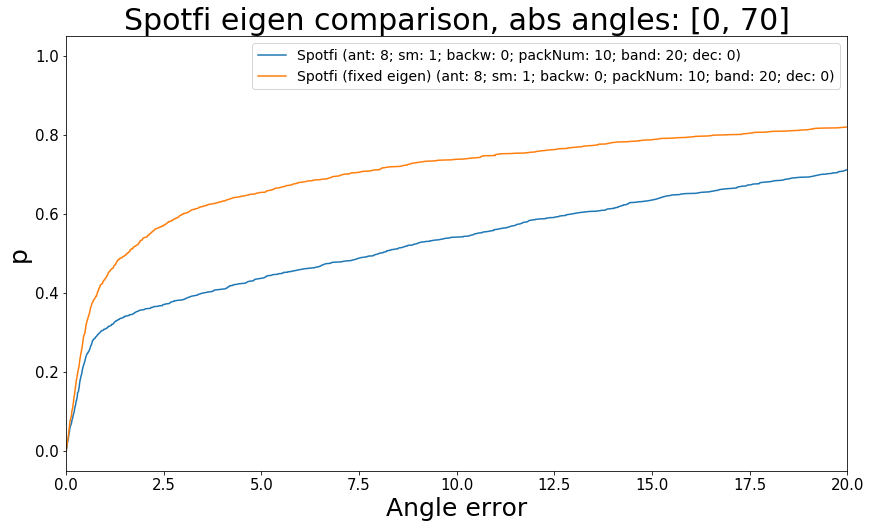

In [1189]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

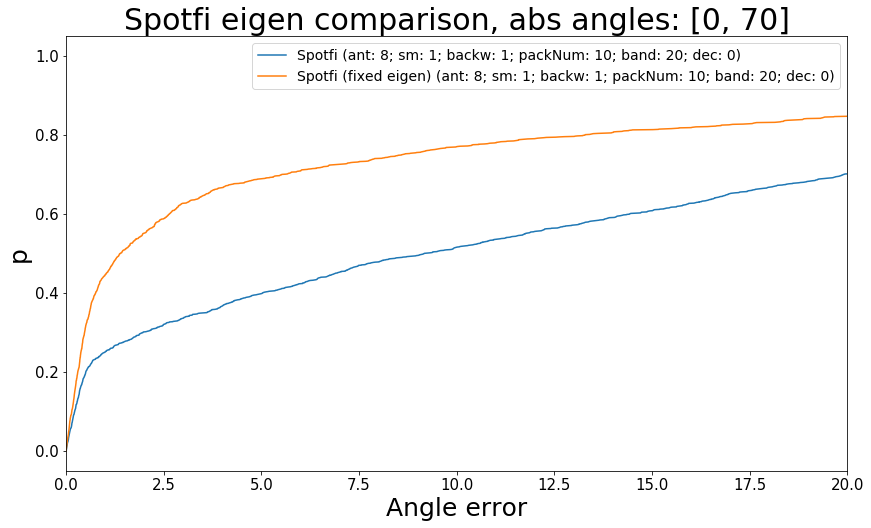

In [1190]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

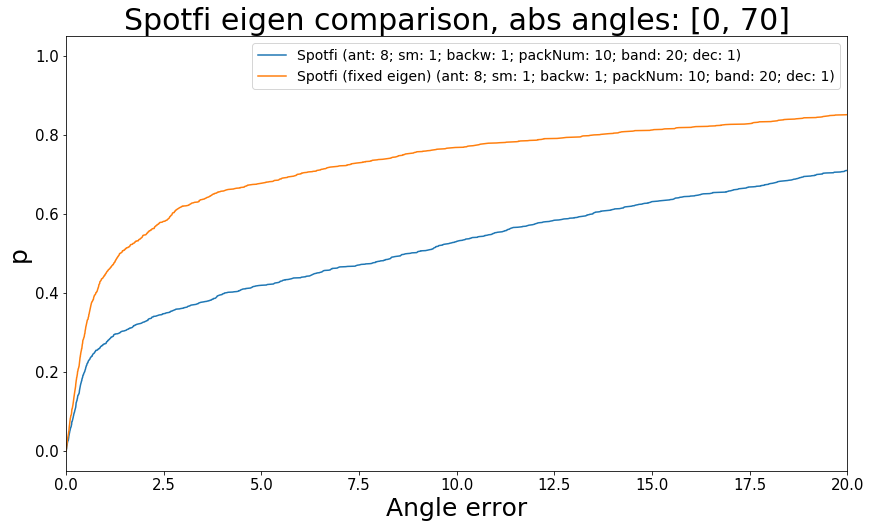

In [1191]:
p1 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi eigen comparison, abs angles: [0, 70]", 20)

1) Fixed amount of eigen values works better.

# Which configuration of Spotfi is better?

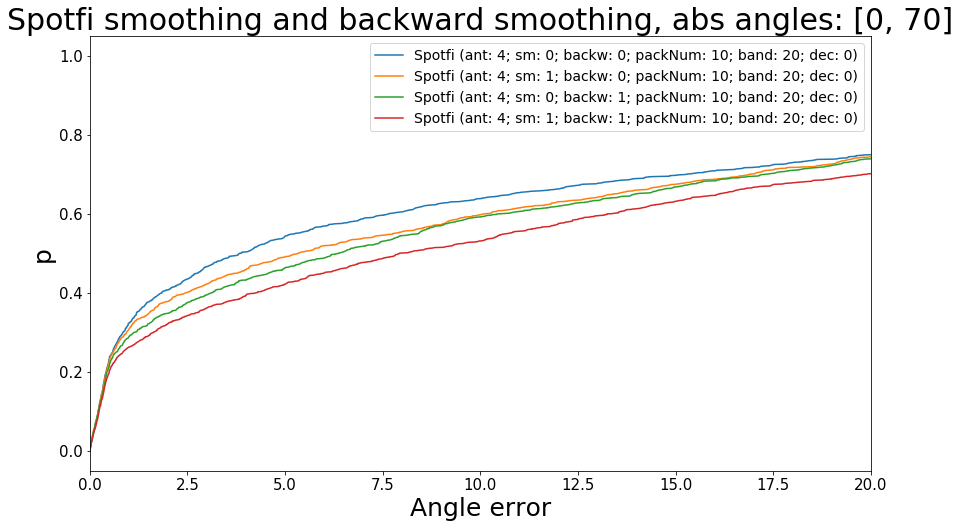

In [1192]:
p1 = param(alg="spotfi", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

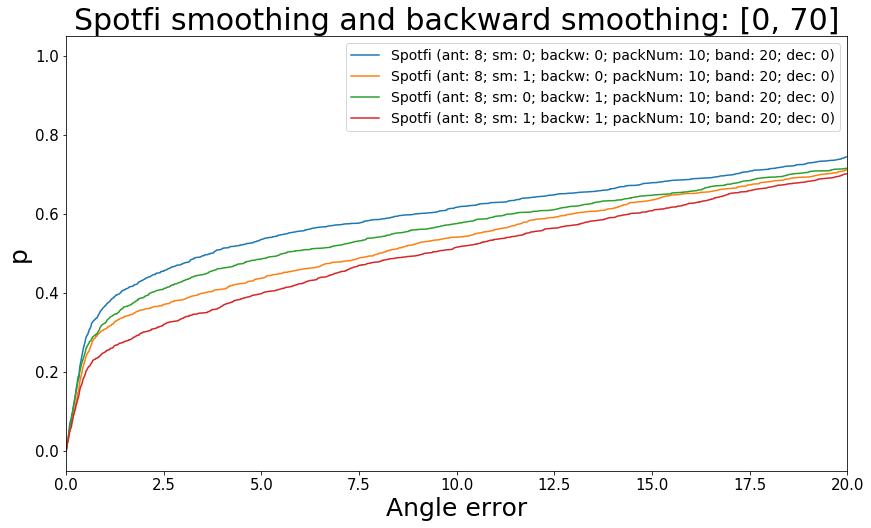

In [1193]:
p1 = param(alg="spotfi", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing: [0, 70]", 20)

1) Smoothing DECREASES accuracy when eigen values amount is not FIXED.

2) Backward smoothing DECREASES accuracy when eigen values amount is not FIXED.

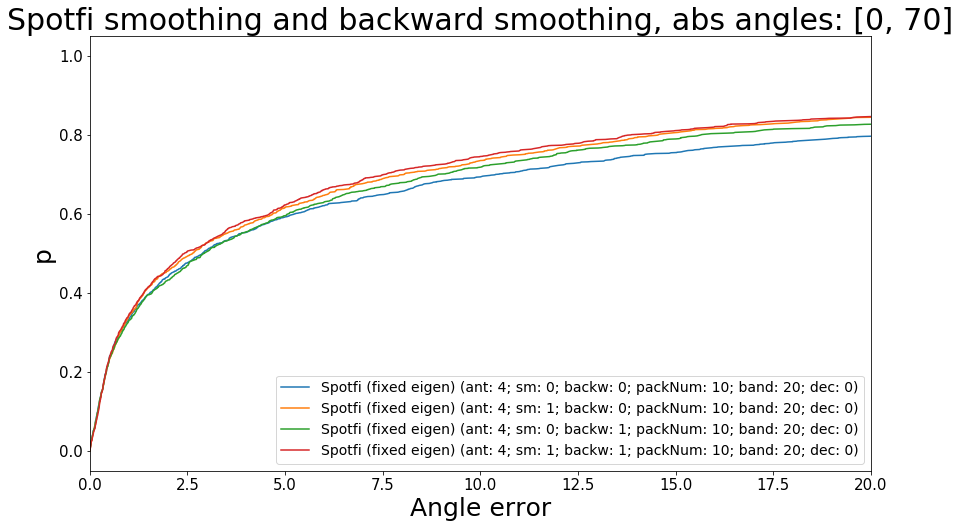

In [1194]:
p1 = param(alg="spotfi_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi_fixed", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

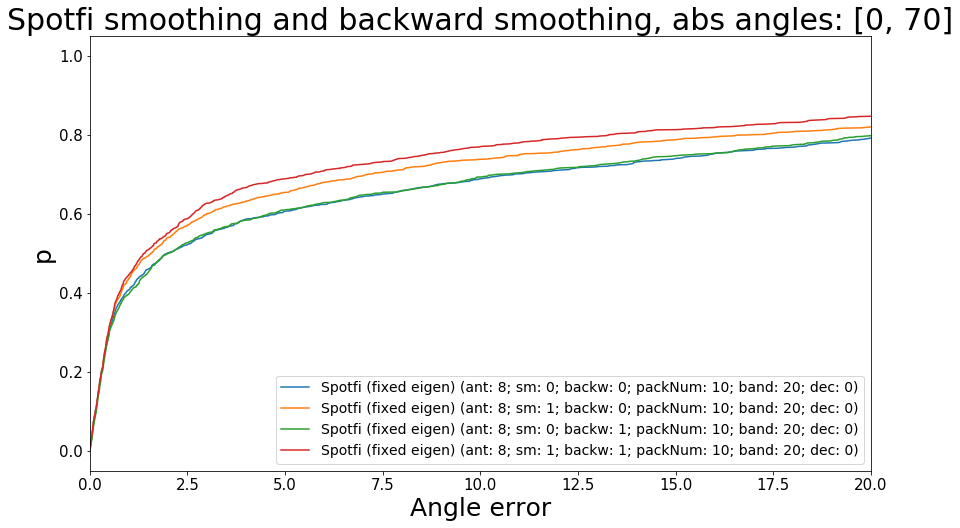

In [1196]:
p1 = param(alg="spotfi_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="spotfi_fixed", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Spotfi smoothing and backward smoothing, abs angles: [0, 70]", 20)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing INCREASES accuracy when eigen values amount is FIXED.

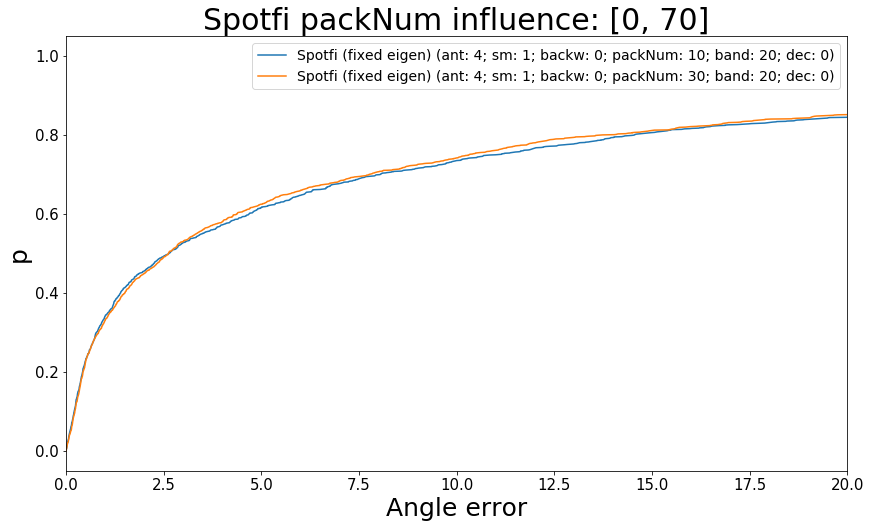

In [1198]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence: [0, 70]", 20)

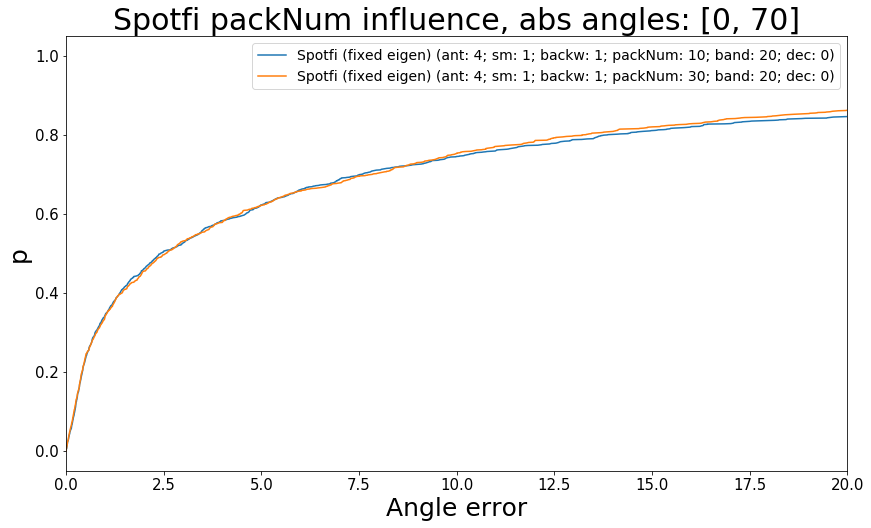

In [1199]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence, abs angles: [0, 70]", 20)

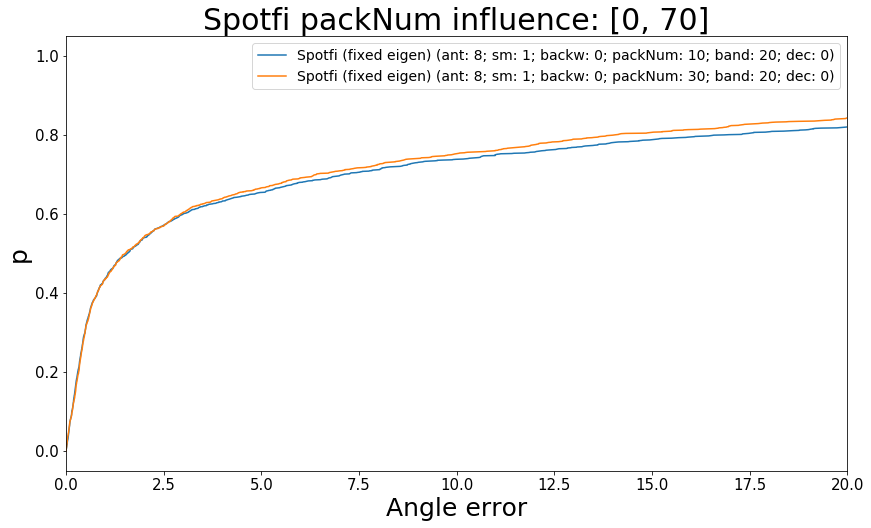

In [1200]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence: [0, 70]", 20)

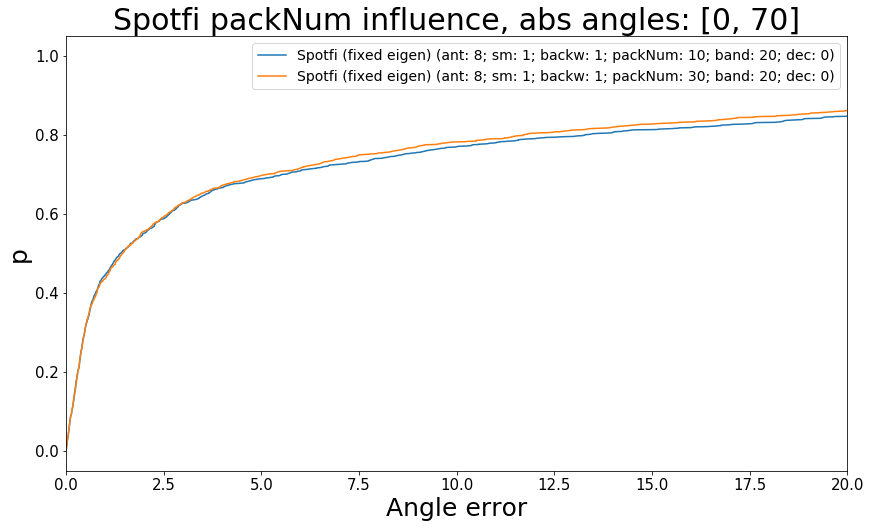

In [1201]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi packNum influence, abs angles: [0, 70]", 20)

1) Number of packets almost doesn't affect estimation accuracy in case of 4 antennas.

2) Increase of packet number slightly increases estimation accuracy in case of 8 antennas.

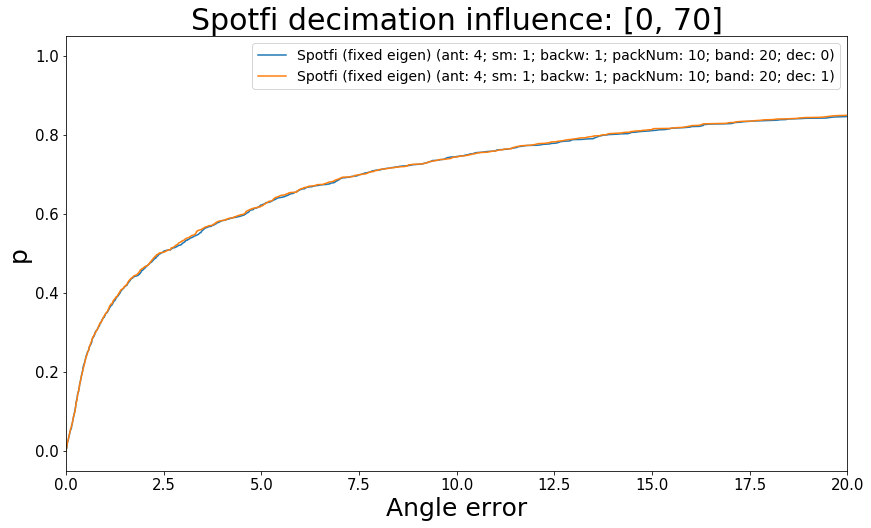

In [1202]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi decimation influence: [0, 70]", 20)

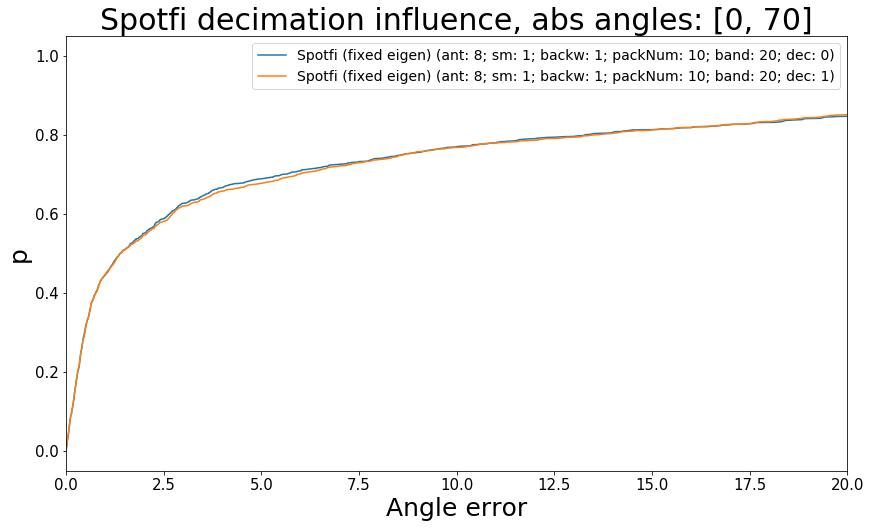

In [1203]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi decimation influence, abs angles: [0, 70]", 20)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation slightly decreases estimation accuracy in case of 8 antennas.

# Which configuration of OpArray is better?

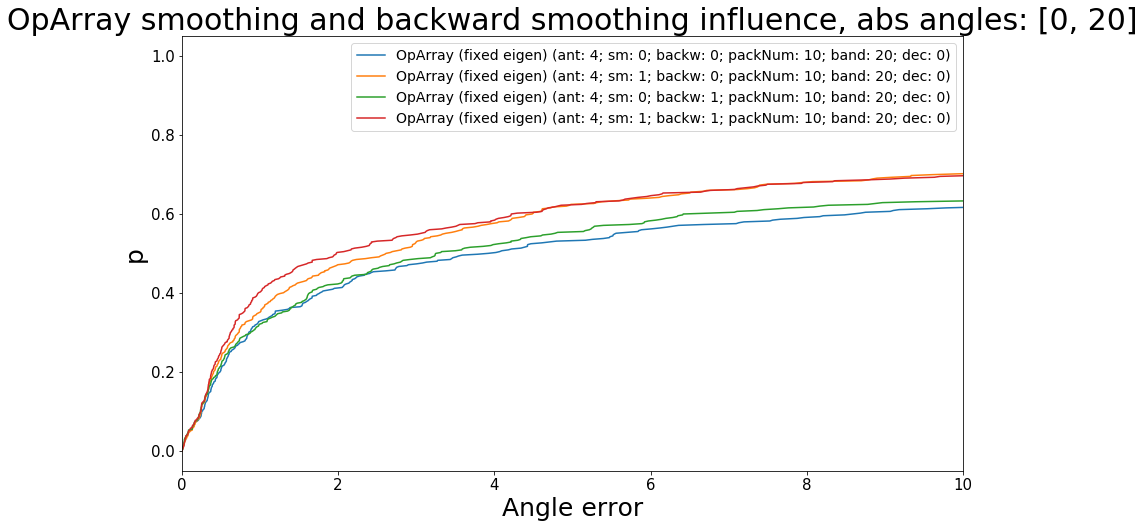

In [1204]:
p1 = param(alg="oparray_fixed", ant=4, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="oparray_fixed", ant=4, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "OpArray smoothing and backward smoothing influence, abs angles: [0, 20]", 10)

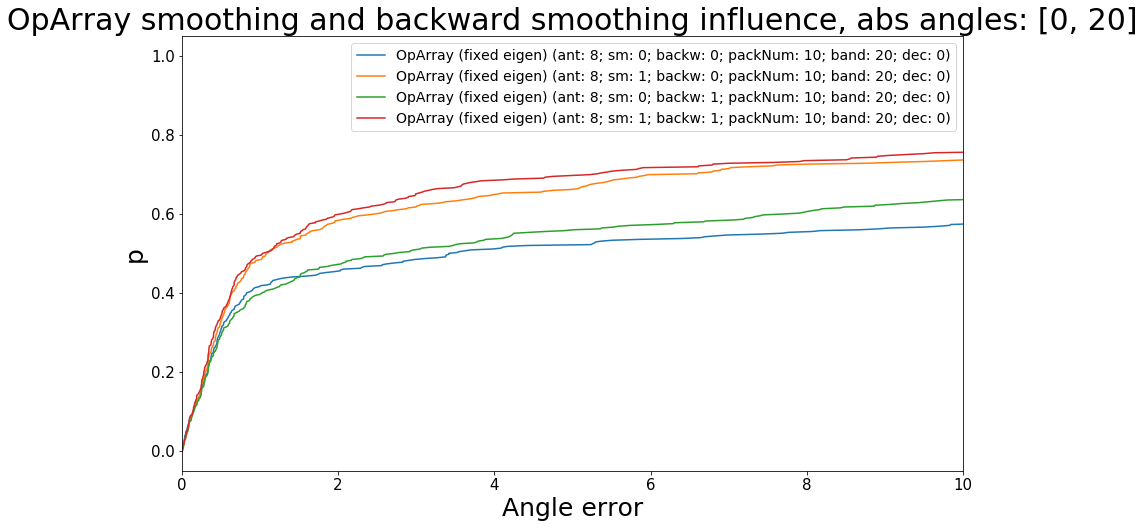

In [1205]:
p1 = param(alg="oparray_fixed", ant=8, sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p3 = param(alg="oparray_fixed", ant=8, sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p4 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "OpArray smoothing and backward smoothing influence, abs angles: [0, 20]", 10)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing significantly INCREASES accuracy when eigen values amount is FIXED.

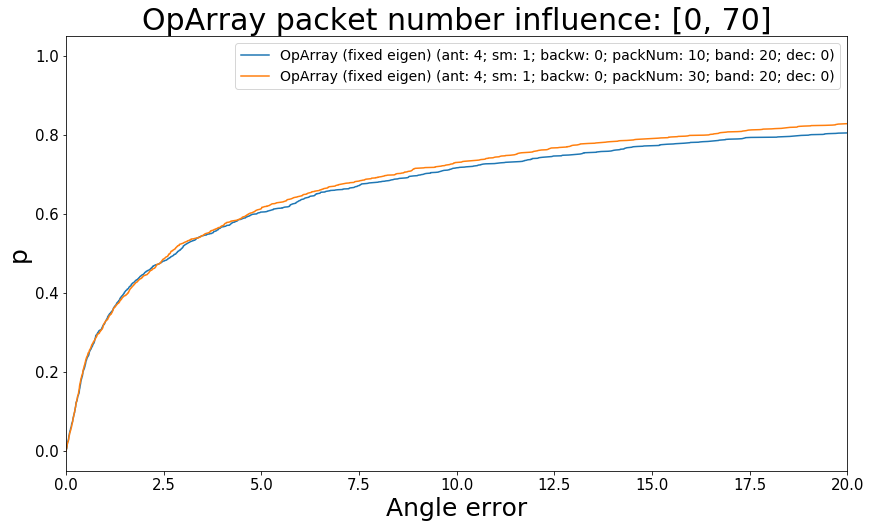

In [1206]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence: [0, 70]", 20)

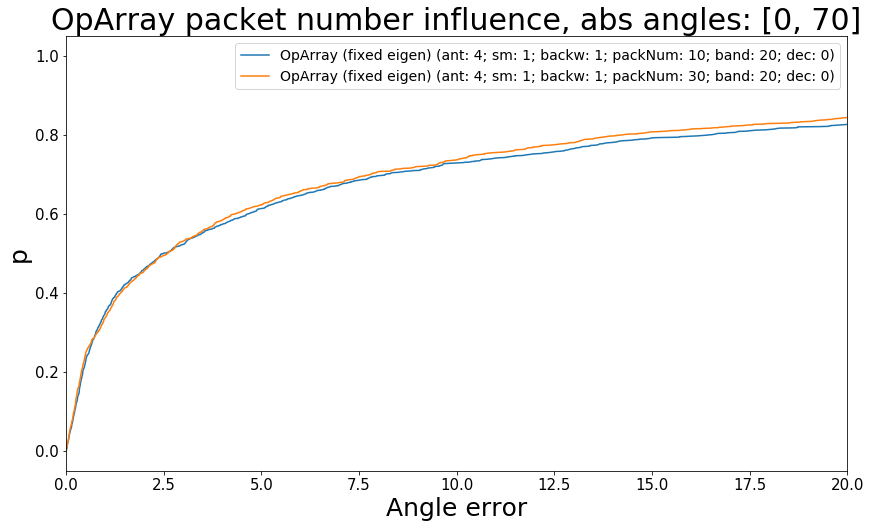

In [1207]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

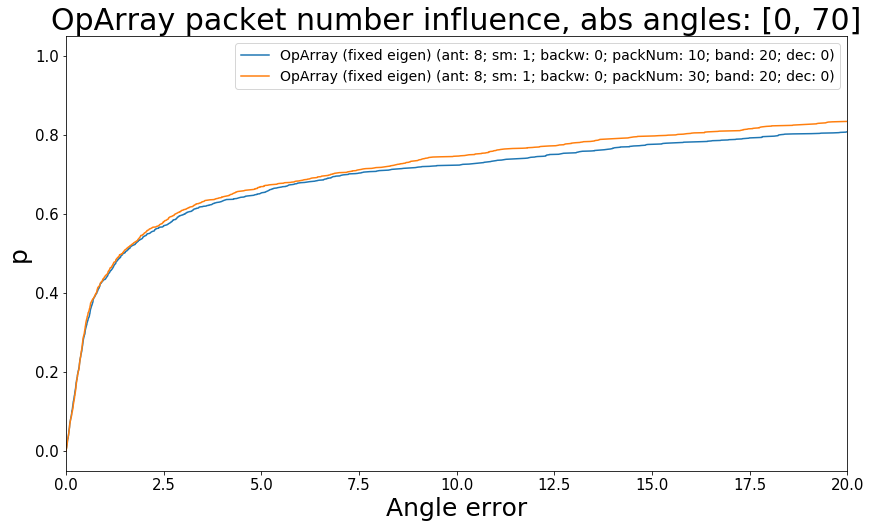

In [1208]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

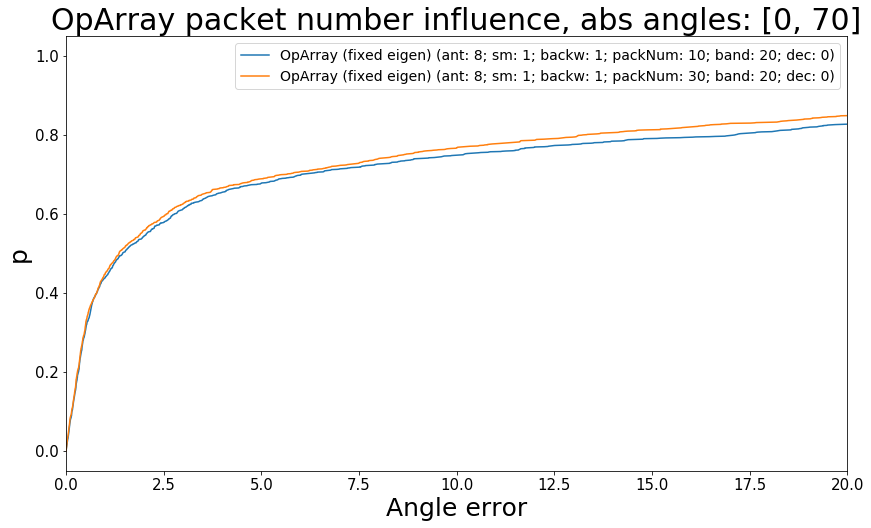

In [1209]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray packet number influence, abs angles: [0, 70]", 20)

1) Increase of packet number increases estimation accuracy of Orion in all cases.

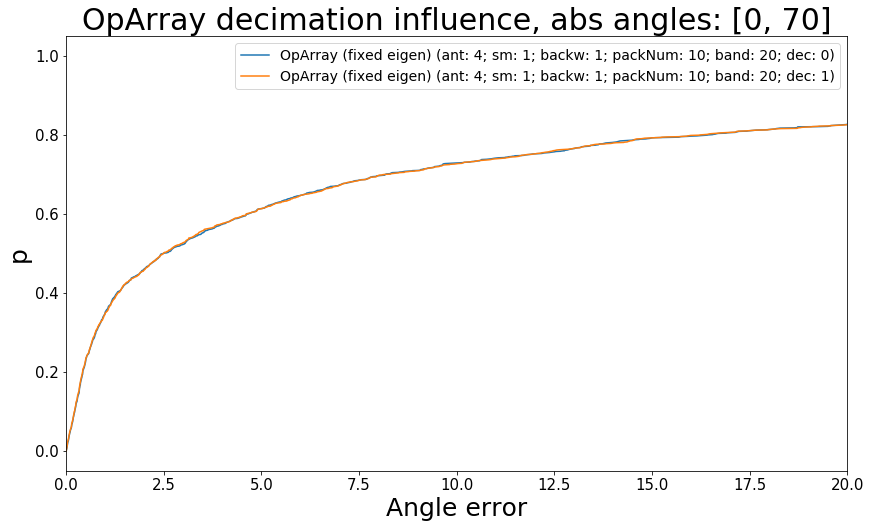

In [1212]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray decimation influence, abs angles: [0, 70]", 20)

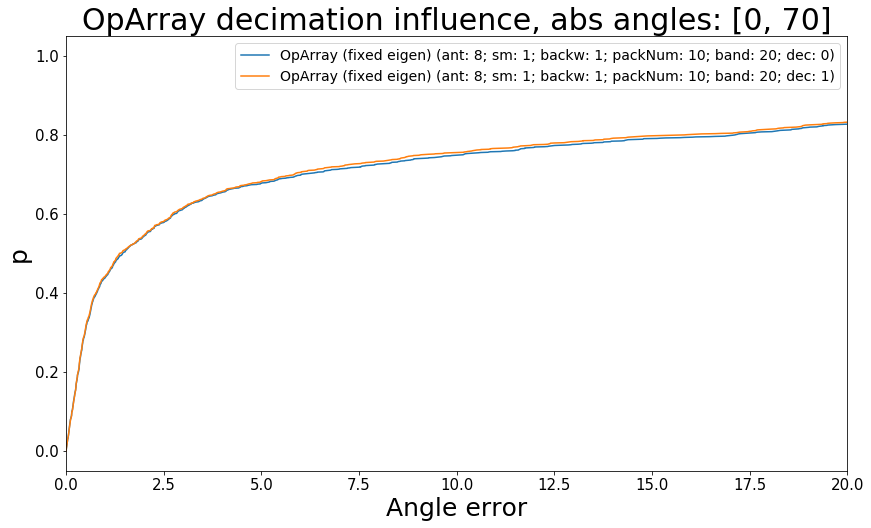

In [1213]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 70], "OpArray decimation influence, abs angles: [0, 70]", 20)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation even slightly increases estimation accuracy in case of 8 antennas.

# Spotfi or OpArray?

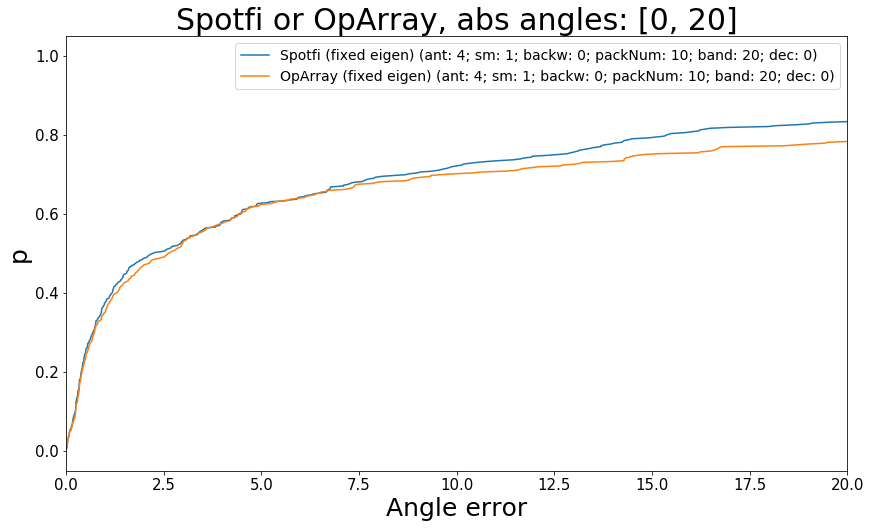

In [1223]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

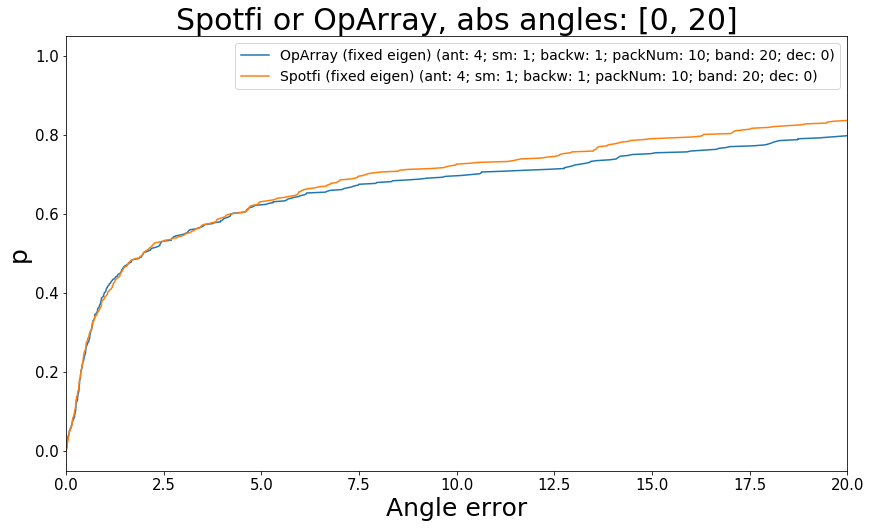

In [1224]:
p1 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

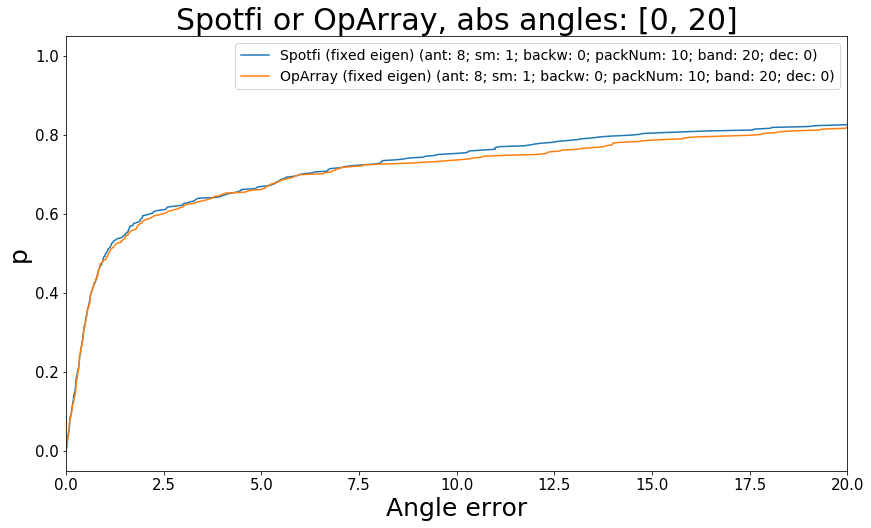

In [1225]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

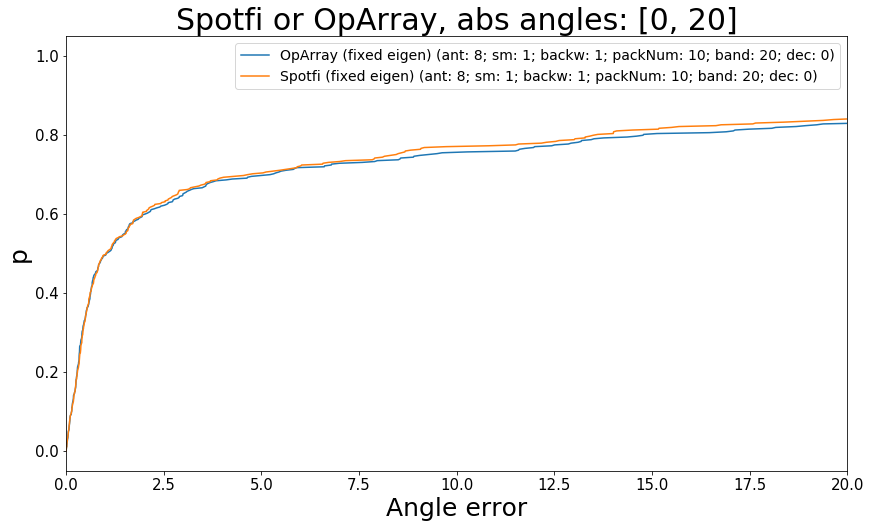

In [1226]:
p1 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)
p2 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=2000)

p = [p1,p2]

plotResults(p, [0, 20], "Spotfi or OpArray, abs angles: [0, 20]", 20)

1) In general Spotfi works better than OpArray.

# Best algorithms comparison in different angle range

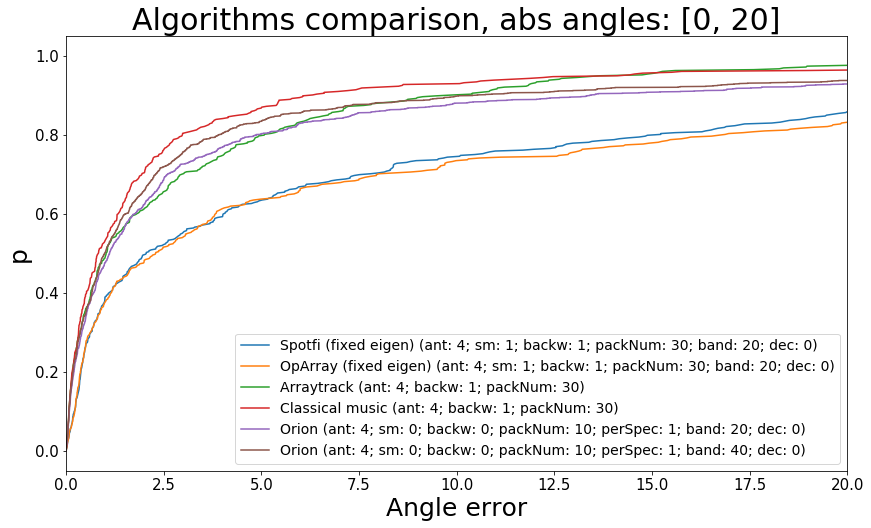

In [1268]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p3 = param(alg="arraytrack", ant=4, backw=1, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=1, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 20], "Algorithms comparison, abs angles: [0, 20]", 20)

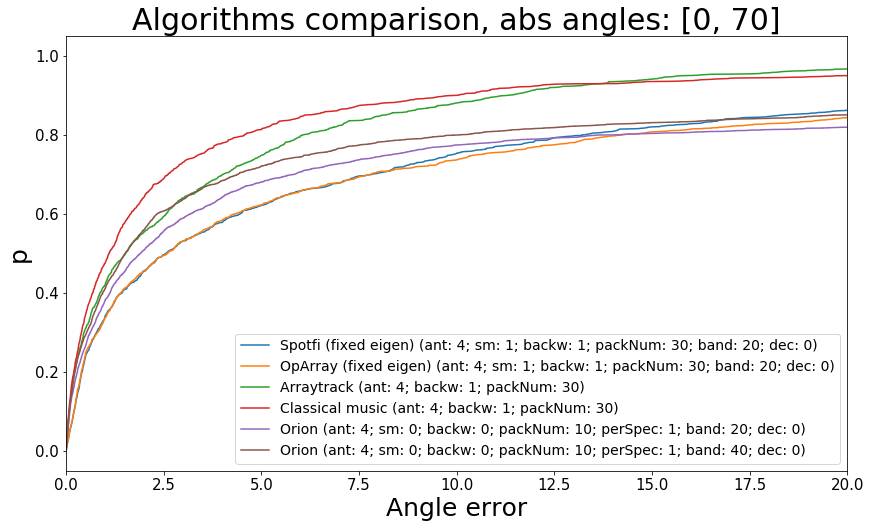

In [1270]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=4, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p3 = param(alg="arraytrack", ant=4, backw=1, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=4, backw=1, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 20)

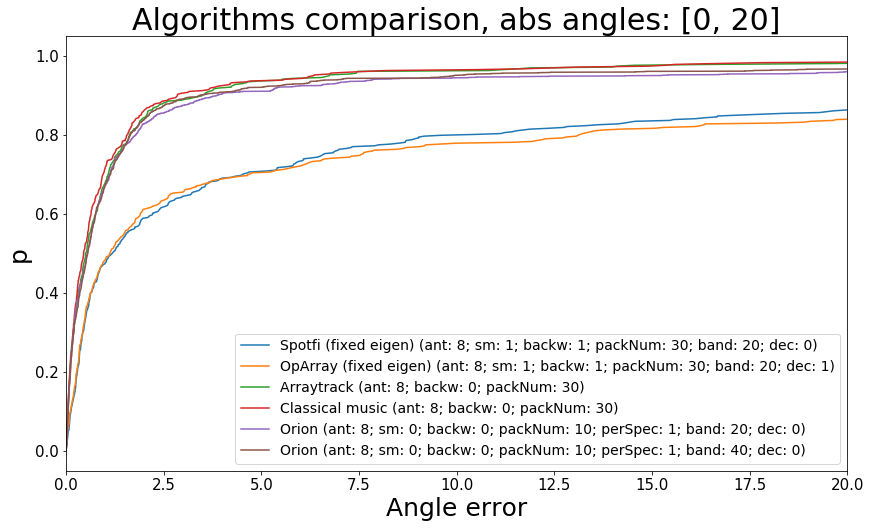

In [1271]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=1, seed_lim=2000)
p3 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 20], "Algorithms comparison, abs angles: [0, 20]", 20)

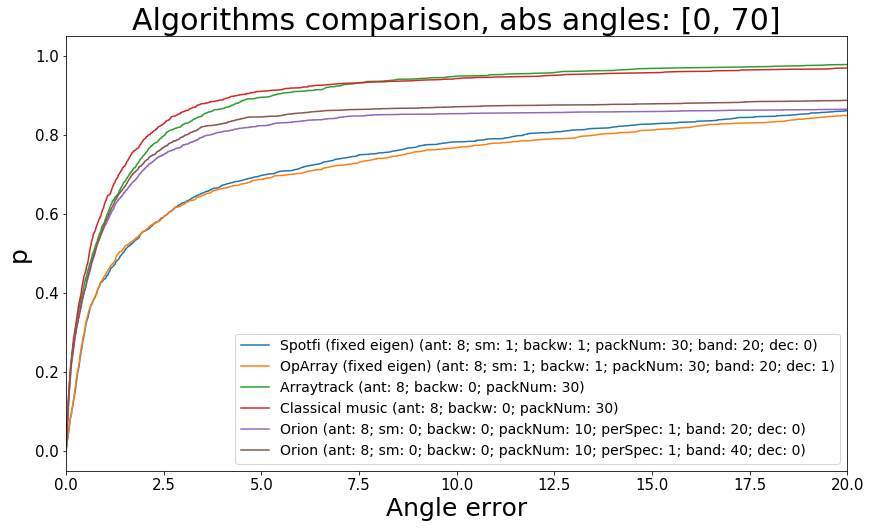

In [1272]:
p1 = param(alg="spotfi_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=2000)
p2 = param(alg="oparray_fixed", ant=8, sm=1, backw=1, packNum=30, band=20, dec=1, seed_lim=2000)
p3 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=2000)
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=2000)
p5 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p6 = param(alg="orion", ant=8, sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)

p = [p1,p2,p3,p4,p5,p6]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 20)

# Are there mistakes in LOS determination?

In [641]:
pd.set_option('display.max_rows', 101)
next_next_better = spotfi[(spotfi.errorAngle > spotfi.errorNextNextAngle)]
next_next_better = next_next_better[['realAngle', 'meanA1', 'meanA2', 'meanA3', 'clSize1', 'clSize2', \
                                     'clSize3', 'stdA1', 'stdA2', 'stdA3', 'spectrumsNum', 'SNR', 'Kfactor']]
next_next_better

,realAngle,meanA1,meanA2,meanA3,clSize1,clSize2,clSize3,stdA1,stdA2,stdA3,spectrumsNum,SNR,Kfactor
259,66.7318,12.043,-52.400,34.333,46,15,15,39.996,2.444,1.047,15.0,4.43990,19.6148
263,66.7318,33.667,-52.200,35.000,6,5,5,17.247,3.271,0.707,5.0,4.43990,19.6148
278,66.7318,31.368,-40.875,35.600,19,8,5,14.667,15.254,30.754,5.0,4.43990,19.6148
280,66.7318,-42.419,39.704,20.044,105,98,90,6.903,13.963,30.136,30.0,4.43990,19.6148
283,66.7318,34.186,-50.889,37.455,43,18,11,12.646,3.341,24.837,15.0,4.43990,19.6148
285,66.7318,-44.000,25.923,31.565,42,39,23,6.677,25.669,26.831,10.0,4.43990,19.6148
286,66.7318,36.900,-46.462,41.250,20,13,8,14.850,5.695,21.881,5.0,4.43990,19.6148
288,66.7318,-48.918,27.034,11.450,61,58,40,16.366,14.046,20.943,30.0,4.43990,19.6148
289,66.7318,-48.469,26.836,11.750,64,61,36,17.027,13.781,18.061,30.0,4.43990,19.6148
295,66.7318,33.200,-51.250,37.333,5,4,3,3.493,3.500,12.423,5.0,4.43990,19.6148


In [642]:
next_next_better.iloc[2:5]

,realAngle,meanA1,meanA2,meanA3,clSize1,clSize2,clSize3,stdA1,stdA2,stdA3,spectrumsNum,SNR,Kfactor
278,66.7318,31.368,-40.875,35.600,19,8,5,14.667,15.254,30.754,5.0,4.4399,19.6148
280,66.7318,-42.419,39.704,20.044,105,98,90,6.903,13.963,30.136,30.0,4.4399,19.6148
283,66.7318,34.186,-50.889,37.455,43,18,11,12.646,3.341,24.837,15.0,4.4399,19.6148


In [648]:
spotfi.iloc[259:311]

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,nextAngle,nextNextAngle,errorAngle,errorNextAngle,errorNextNextAngle,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
259,5,4.4399,19.6148,66.7318,8,30,2,False,False,20,True,12.043,-52.400,34.333,54.6888,119.1318,32.3988,46,39.996,37.728,12.043,246.804,15,2.444,3.432,-52.400,64.733,15,1.047,2.588,34.333,45.867,13,19.511,56.092,40.000,104.615,0,NaN,NaN,NaN,NaN,15.0
260,5,4.4399,19.6148,66.7318,8,10,1,False,False,20,False,28.519,-40.407,25.000,38.2128,107.1388,41.7318,27,12.831,48.923,28.519,84.926,27,13.162,115.237,-40.407,73.407,26,30.341,15.619,25.000,283.038,25,29.115,46.147,-13.640,-247.400,0,NaN,NaN,NaN,NaN,10.0
261,5,4.4399,19.6148,66.7318,8,10,1,False,False,20,True,29.379,22.179,-38.773,37.3528,44.5528,105.5048,29,12.760,77.603,29.379,70.276,28,31.542,15.128,22.179,284.143,22,20.775,104.708,-38.773,-1.500,8,1.727,32.162,-37.875,203.875,0,NaN,NaN,NaN,NaN,10.0
262,5,4.4399,19.6148,66.7318,8,10,2,False,False,20,False,40.167,-52.200,35.000,26.5648,118.9318,31.7318,6,19.209,71.433,40.167,216.500,5,3.271,3.564,-52.200,64.200,5,0.707,2.950,35.000,47.200,3,3.000,47.014,-37.000,201.333,0,NaN,NaN,NaN,NaN,5.0
263,5,4.4399,19.6148,66.7318,8,10,2,False,False,20,True,33.667,-52.200,35.000,33.0648,118.9318,31.7318,6,17.247,66.823,33.667,206.833,5,3.271,3.564,-52.200,64.200,5,0.707,3.347,35.000,47.200,4,3.162,45.464,-36.000,213.500,0,NaN,NaN,NaN,NaN,5.0
264,5,4.4399,19.6148,66.7318,8,30,1,False,True,20,False,32.692,24.568,-44.651,34.0398,42.1638,111.3828,91,17.644,44.889,32.692,87.824,74,33.753,20.102,24.568,276.311,63,11.293,63.700,-44.651,114.714,36,21.549,76.496,-0.722,-197.556,0,NaN,NaN,NaN,NaN,30.0
265,5,4.4399,19.6148,66.7318,8,30,1,False,True,20,True,33.570,26.957,-42.765,33.1618,39.7748,109.4968,86,17.192,42.982,33.570,85.140,69,32.915,18.578,26.957,278.116,68,12.876,69.973,-42.765,124.779,13,20.960,72.169,23.154,-179.231,0,NaN,NaN,NaN,NaN,30.0
266,5,4.4399,19.6148,66.7318,8,30,2,False,True,20,False,41.708,15.609,-49.333,25.0238,51.1228,116.0648,24,8.595,23.135,41.708,63.500,23,38.672,28.324,15.609,256.696,18,6.136,28.472,-49.333,75.778,7,13.133,117.267,16.143,48.286,0,NaN,NaN,NaN,NaN,15.0
267,5,4.4399,19.6148,66.7318,8,30,2,False,True,20,True,40.172,-11.118,-51.467,26.5598,77.8498,118.1988,29,11.576,23.939,40.172,67.793,17,32.434,74.498,-11.118,157.941,15,2.924,3.668,-51.467,63.800,12,23.655,16.277,36.083,271.750,0,NaN,NaN,NaN,NaN,15.0
268,5,4.4399,19.6148,66.7318,8,10,1,False,True,20,False,33.129,27.667,-14.105,33.6028,39.0648,80.8368,31,15.013,36.463,33.129,75.806,24,30.510,13.495,27.667,286.125,19,35.906,37.844,-14.105,202.789,11,7.368,22.167,-49.909,57.818,0,NaN,NaN,NaN,NaN,10.0


In [603]:
spotfi[(spotfi.errorAngle > spotfi.errorNextAngle)]

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,nextAngle,nextNextAngle,errorAngle,errorNextAngle,errorNextNextAngle,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5
100,2,8.7199,56.16740,-85.3333,4,10,1,False,False,20,False,-83.556,-87.000,NaN,1.7773,1.6667,NaN,9,0.726,0.000,-83.556,43.000,1,0.000,0.000,-87.000,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
101,2,8.7199,56.16740,-85.3333,4,10,1,False,False,20,True,-83.556,-87.000,NaN,1.7773,1.6667,NaN,9,0.726,0.333,-83.556,43.111,1,0.000,0.000,-87.000,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
108,2,8.7199,56.16740,-85.3333,4,10,1,False,True,20,False,-83.556,-87.000,NaN,1.7773,1.6667,NaN,9,0.726,0.000,-83.556,43.000,1,0.000,0.000,-87.000,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
109,2,8.7199,56.16740,-85.3333,4,10,1,False,True,20,True,-83.556,-87.000,NaN,1.7773,1.6667,NaN,9,0.726,0.333,-83.556,43.111,1,0.000,0.000,-87.000,44.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
258,5,4.4399,19.61480,66.7318,8,30,2,False,False,20,False,14.184,36.962,-52.6,52.5478,29.7698,119.3318,38,42.234,38.535,14.184,244.447,26,12.723,39.455,36.962,64.231,15,2.324,3.441,-52.6,64.533,5,5.595,137.278,-27.6,-124.4,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172720,2726,8.2595,0.56002,44.9919,4,30,1,True,False,20,False,53.900,36.867,NaN,8.9081,8.1249,NaN,30,1.398,1.780,53.900,69.933,30,0.346,0.479,36.867,44.333,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
172724,2726,8.2595,0.56002,44.9919,4,10,1,True,False,20,False,53.100,37.000,NaN,8.1081,7.9919,NaN,10,1.449,1.969,53.100,69.100,10,0.000,0.316,37.000,44.100,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
172726,2726,8.2595,0.56002,44.9919,4,10,2,True,False,20,False,53.200,37.000,NaN,8.2081,7.9919,NaN,5,1.095,0.894,53.200,69.400,5,0.000,0.447,37.000,44.200,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
172727,2726,8.2595,0.56002,44.9919,4,10,2,True,False,20,True,53.000,37.000,NaN,8.0081,7.9919,NaN,5,0.707,0.894,53.000,69.400,5,0.000,0.447,37.000,44.200,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


# Let's group data

In [12]:
ori_gr=ori.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [13]:
pd.DataFrame(ori_gr.groupby(by=['ant', 'bandwidth', 'packetNum', 'packetPerSpec', 'decimation']).mean())

errorAngle
ant bandwidth packetNum packetPerSpec decimation            
4   20        10        1             0            17.923508
                                      1            18.593041
                        2             0            17.409769
                                      1            18.659894
    40        10        1             0            13.799084
                                      1            15.306967
                        2             0            13.591583
                                      1            15.374555
8   20        10        1             0            13.186920
                                      1            13.986660
                        2             0            13.478583
                                      1            14.158947
    40        10        1             0            11.206132
                                      1            11.919342
                        2             0            11.921161
                                      1            12.603290

In [14]:
arr_gr=arr.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [15]:
arr[arr.nextAngle != 999]

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
64,8,3,5,4.4399,19.6148,66.7318,66.6300,0.180330,0.101820,-47.3533,11.7742,1,30
65,8,3,5,4.4399,19.6148,66.7318,66.6500,0.164990,0.081815,-24.4200,10.6274,1,10
68,8,1,5,4.4399,19.6148,66.7318,66.5000,0.254610,0.231820,-23.1667,6.4460,1,30
69,8,1,5,4.4399,19.6148,66.7318,66.5800,0.265830,0.151820,-21.6500,4.8654,1,10
72,4,2,5,4.4399,19.6148,66.7318,67.2467,0.505650,0.514850,-24.5500,6.9895,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159973,8,1,9999,16.4678,5.8899,-50.6515,-50.2700,0.048305,0.381510,77.1000,2.1087,1,10
159974,8,1,9999,16.4678,5.8899,-50.6515,-50.2367,0.085029,0.414840,64.6367,38.9242,0,30
159975,8,1,9999,16.4678,5.8899,-50.6515,-50.2400,0.051640,0.411510,77.1200,2.1540,0,10
159988,8,1,10000,10.9094,7.0777,-59.0642,-59.8267,0.063968,0.762420,-4.6367,43.6980,1,30


In [16]:
pd.DataFrame(arr[(arr.errorAngle < 10) | (arr.nextAngle == 999)].groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

subArrNum         seed        SNR   Kfactor  \
ant backwSmth packetNum                                                
4   0         10          1.502204  5079.155352  10.168480  6.684266   
              30          1.501706  5077.176230  10.169560  6.684206   
    1         10          1.503084  5120.131306  10.283231  6.888828   
              30          1.503660  5112.243051  10.288916  6.883325   
8   0         10          2.005007  5058.026393  10.113986  6.646931   
              30          2.005967  5060.550094  10.125783  6.662422   
    1         10          2.009787  5084.172065  10.242925  6.794700   
              30          2.010490  5070.069590  10.243681  6.774592   

                         realAngle  estAngle  stdAngle  errorAngle  \
ant backwSmth packetNum                                              
4   0         10         -0.051097 -0.301325  3.376491    7.470219   
              30         -0.081086 -0.332962  3.801780    7.484920   
    1         10         -0.203720 -0.240321  2.254888    4.865046   
              30         -0.203896 -0.240504  2.533275    4.864219   
8   0         10         -0.323134 -0.365862  1.271735    3.055382   
              30         -0.279831 -0.347731  1.464986    3.009736   
    1         10         -0.371571 -0.321383  0.869167    1.829250   
              30         -0.436550 -0.372342  0.978595    1.790986   

                          nextAngle  stdNextAngle  
ant backwSmth packetNum                            
4   0         10         735.869219    739.675302  
              30         736.240202    740.373166  
    1         10         392.764624    399.571713  
              30         392.516593    399.881694  
8   0         10         431.283093    436.510534  
              30         432.751675    438.680479  
    1         10         163.264497    169.065414  
              30         162.996337    169.787224

In [17]:
pd.DataFrame(arr_gr.groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

subArrNum  errorAngle
ant backwSmth packetNum                       
4   0         10               1.5    9.653352
              30               1.5    9.677044
    1         10               1.5    9.793960
              30               1.5    9.753982
8   0         10               2.0    5.635112
              30               2.0    5.763855
    1         10               2.0    6.744307
              30               2.0    6.769971

In [18]:
pd.DataFrame(ori[(ori.errorAngle < 10) | (ori.nextAngle == 999)].groupby(by=['ant', 'bandwidth', 'packetPerSpec', 'decimation', 'packetNum']).mean()).drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'estAngle', 'nextAngle', 'stdNextAngle'])

stdAngle  errorAngle
ant bandwidth packetPerSpec decimation packetNum                      
4   20        1             0          10         1.655274    2.095977
                            1          10         1.581946    2.069431
              2             0          10         1.311666    2.018757
                            1          10         1.269635    1.989878
    40        1             0          10         1.259224    1.654035
                            1          10         1.161099    1.620407
              2             0          10         0.948262    1.636753
                            1          10         0.906127    1.602074
8   20        1             0          10         0.486119    0.840135
                            1          10         0.465269    0.844772
              2             0          10         0.527009    0.889458
                            1          10         0.469452    0.880072
    40        1             0          10         0.494872    0.802487
                            1          10         0.419531    0.790507
              2             0          10         0.510969    0.832025
                            1          10         0.397244    0.802742

In [19]:
arr

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
0,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,1,30
1,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,1,10
2,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,0,30
3,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,0,10
4,8,1,1,8.3404,16.5439,39.6584,39.7367,0.049013,0.078258,999.0,999.0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,4,2,10000,10.9094,7.0777,-59.0642,-60.3400,0.275680,1.275800,999.0,999.0,0,10
159996,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,1,30
159997,4,1,10000,10.9094,7.0777,-59.0642,-60.2600,0.171270,1.195800,999.0,999.0,1,10
159998,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,0,30


In [124]:
pd.set_option('display.max_rows', 30)

In [22]:
arr[arr.errorNextAngle < arr.errorAngle]

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum,errorNextAngle
160,8,3,11,3.60540,24.5991,-86.4945,4.8433,13.95030,91.33780,-80.0967,19.8625,1,30,6.3978
161,8,3,11,3.60540,24.5991,-86.4945,12.4700,11.74370,98.96450,-71.5200,32.9464,1,10,14.9745
164,8,1,11,3.60540,24.5991,-86.4945,1.5167,14.13890,88.01110,-13.1433,14.6698,1,30,73.3512
741,8,1,47,2.26980,99.0412,85.4070,-20.4800,5.08700,105.88700,26.2000,5.9410,1,10,59.2070
744,4,2,47,2.26980,99.0412,85.4070,-2.8967,24.65730,88.30360,60.8700,43.7581,1,30,24.5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159505,8,3,9970,0.66916,7.7876,71.9558,71.4800,1.67250,0.47581,72.3600,1.8350,1,10,0.4042
159952,8,3,9998,3.87090,6.9865,59.7182,57.9233,1.14400,1.79490,60.3767,3.8096,1,30,0.6585
159953,8,3,9998,3.87090,6.9865,59.7182,58.0400,0.96632,1.67820,59.9800,3.5178,1,10,0.2618
159956,8,1,9998,3.87090,6.9865,59.7182,58.1067,1.31780,1.61160,58.8133,2.4425,1,30,0.9049


In [193]:
pd.set_option('display.max_columns', None)

In [37]:
pd.set_option('display.max_rows', None)
gr_sp = pd.DataFrame(spotfi[spotfi.errorAngle < 10].groupby(by=['ant', 'smoothing', 'backw', 'bandwidth', 'packetPerSpec', 'decimation', 'packetNum']).mean()).drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'clSize1', 'stdA1', 'stdD1', 'meanA1', 'meanD1', 'clSize2', 'stdA2', 'stdD2', 'meanA2', 'meanD2', 'clSize3', 'stdA3', 'stdD3', 'meanA3', 'meanD3', 'clSize4', 'stdA4', 'stdD4', 'meanA4', 'meanD4', 'clSize5', 'stdA5', 'stdD5', 'meanA5', 'meanD5'])

In [583]:
gr_sp.head()

errorAngle
ant smoothing backw bandwidth packetPerSpec decimation packetNum            
4   0         0     20        1             0          10           2.419647
                                                       30           2.511076
                                            1          10           2.478180
                                                       30           2.522200
                              2             0          10           2.397640